# Module 2 Unit 2
## Learn to fit a tree-based model

### Regression problem



In [1]:
# Import libraries
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree  
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import data
df = pd.read_csv('Boston.csv', delimiter = ",")

Once the data is imported, a summary of the number of rows and columns can be displayed using `df.shape`.  
The output is: `(number of rows, number of columns)`

In [3]:
# Explore the size of the data set.
df.shape

(506, 15)

Next, the first couple of rows can be viewed using `df.head()`.  
The default number of rows shown is 5, but this can be specified. For example, to see 10 you would use `df.head(10)`.

In [4]:
# Explore the type of data and feature names.
df.head(8)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1


In [5]:
# Dealing with missing values
print(df.isnull().sum())  # displays the number of null values for each field

# Checks whether or not there are ANY null values in the dataframe
print("Dataframe has null values?",df.isnull().values.any())  
# Alternatively, use df.isnull().sum().sum() to display the total number of null 
# values in the dataframe.

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
b             0
lstat         0
medv          0
dtype: int64
Dataframe has null values? False


This data set has no null values. However, if there were null values, you could replace them with the median of the column by using the following code, where `FIELDNAME` should be replaced with the name of the relevant column:

In [6]:
# median = df['FIELDNAME'].median()
# df['FIELDNAME'].fillna(median, inplace=True)

The following three features will be used to train a tree-based model. 


| Feature       | Description                                           |
| :------------ |:------------------------------------------------------| 
| crim          | Per capita crime rate by town                         | 
| rm            | Average number of rooms per dwelling                  |  
| age           | Proportion of owner-occupied units built prior to 1940|

The response for this data set is as follows.

| Response      | Description                                        |
| :------------ |:---------------------------------------------------| 
| medv          | Median value of owner-occupied homes in USD 1,000s | 



In [7]:
# Split data into features (X) and response (y).
# Note that the column names need to have quotation marks.
X = df.loc[:,["crim","rm","age"]]
y = df.loc[:,["medv"]]   
# Alternatively: y = df.iloc[:,[14,]] (see enrichment exercise below)

You can display the features with the `head()` function.

In [8]:
# Selected features
X.head()

,crim,rm,age
0,0.00632,6.575,65.2
1,0.02731,6.421,78.9
2,0.02729,7.185,61.1
3,0.03237,6.998,45.8
4,0.06905,7.147,54.2


Next, you can also display the response. An alternative to viewing the first few lines is to view the last few lines. You can do this with the `tail()` function.
The default number of rows shown is 5, but this can be specified, as with `head()`.

In [9]:
# Response 
# Note the response is separate from the features.
y.tail()

,medv
501,22.4
502,20.6
503,23.9
504,22.0
505,11.9


In [10]:
# Fit data to tree-based regression model.
# Set random seed with random_state so that the results are consistent.
regressor = DecisionTreeRegressor(random_state=0)
regressor = regressor.fit(X,y)

You can access documentation directly by using the `help` function and adding the function name in the brackets.

In [11]:
help(regressor)

Help on DecisionTreeRegressor in module sklearn.tree._classes object:

class DecisionTreeRegressor(sklearn.base.RegressorMixin, BaseDecisionTree)
 |  DecisionTreeRegressor(*, criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, ccp_alpha=0.0)
 |  
 |  A decision tree regressor.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"mse", "friedman_mse", "mae", "poisson"}, default="mse"
 |      The function to measure the quality of a split. Supported criteria
 |      are "mse" for the mean squared error, which is equal to variance
 |      reduction as feature selection criterion and minimizes the L2 loss
 |      using the mean of each terminal node, "friedman_mse", which uses mean
 |      squared error with Friedman's improvement score for potential splits,
 | 

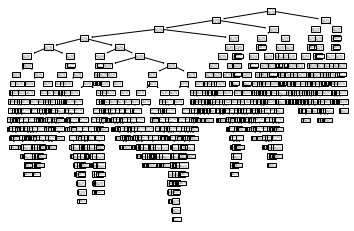

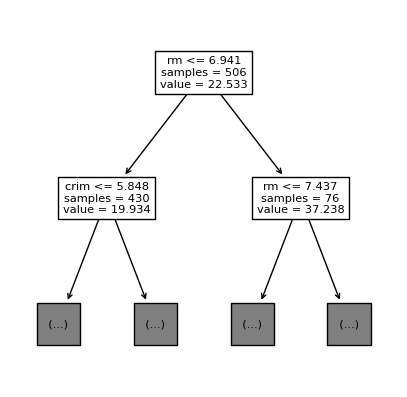

In [12]:
# Visualise the regression tree.
plt.figure()
plot_tree(regressor,feature_names=X.columns)
plt.show()

# Use max_depth to display certain nodes.
plt.figure(figsize=[5,5], dpi=100)
plot_tree(regressor,max_depth=1,feature_names=X.columns,impurity=False)
plt.show()

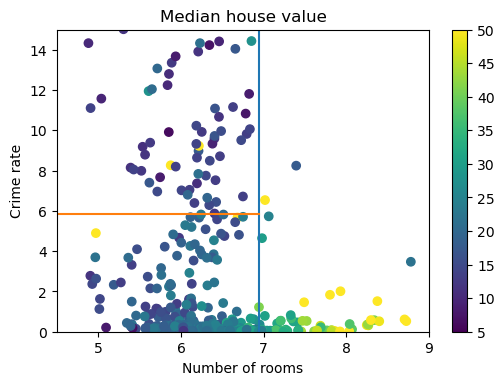

In [13]:
# Plot how the first two decision points of the decision tree 
# partition the data set
# Draw scatterplot of number of rooms vs crime rate.
plt.figure(figsize=[6,4], dpi=100)
cutx, cuty = 4.5, 15    # cut off irrelevant part of the chart
plt.ylim(0,cuty)       
plt.xlim(cutx,9)
plt.xlabel('Number of rooms')
plt.ylabel('Crime rate')
plt.title('Median house value')
plt.scatter(x=X['rm'],y=X['crim'],c=df['medv'])

# Show the first two decision points (the lines partition the data)
splits = regressor.tree_.threshold[:2]   # first two feature thresholds
plt.plot([splits[0],splits[0]], [0,cuty]) 
plt.plot([cutx,splits[0]], [splits[1],splits[1]])
plt.colorbar()
plt.show()

In [14]:
print('\n Average medv for entire sample = ',
           df['medv'].mean(), 
      '\n Average medv for left node (depth=1) = ',
           df.loc[df['rm']<6.941]['medv'].mean(), 
      '\n Number of samples on right node (depth=1) =', 
           len(df.loc[df['rm']>=6.941]['medv']))



 Average medv for entire sample =  22.532806324110698 
 Average medv for left node (depth=1) =  19.93372093023257 
 Number of samples on right node (depth=1) = 76


## Enrichment 
There is more than one way to select columns with the pandas library. In the previous examples, the columns are selected by the column name, but it is also possible to select columns by using numerical indexing.

Explore the pandas documentation to find out how to select a column numerically.  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html

In [15]:
# Select the first three columns using numerical indexing
first_three = df.iloc[:, 0:3] # Remember, the first colon selects all the rows.
first_three.head()

,Unnamed: 0,crim,zn
0,1,0.00632,18.0
1,2,0.02731,0.0
2,3,0.02729,0.0
3,4,0.03237,0.0
4,5,0.06905,0.0


### Practice selecting columns with pandas

1. Assign the second, seventh, and eighth columns to the variable `X`. (Ensure you use `X` as the variable name.)
2. Assign the last column of the dataframe to the variable `y`. (Ensure you use `y` as the variable name.)

In [16]:
# Assign the second, seventh, and eighth columns to the variable "X2".
# Hint: Remember that Python uses zero indexing.
 
### YOUR CODE HERE
X2 = df.iloc[:, [1, 6, 7]]

# You should have the crim, rm, and age columns displayed.
X2.head()

,crim,rm,age
0,0.00632,6.575,65.2
1,0.02731,6.421,78.9
2,0.02729,7.185,61.1
3,0.03237,6.998,45.8
4,0.06905,7.147,54.2


In [17]:
# Assign the last column of the dataframe to the variable "y2".

### YOUR CODE HERE
y2 = df.iloc[:, -1]

# You should have medv column displayed.
y2.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

Continue to the small group discussion forum to discuss how you would interpret the decision tree.